In [1]:
# Import the relevant zonal wind main code 
from zonalwind import * 

#Set path of images
path2data = './data/'

In [2]:


#Get an array of latitudes from -70 to 70 degrees in increments of +0.05 to refer to when printing out latitudes below.
images = glob.glob(path2data + '*.fits')
image1 = images[0]
hdulist = fits.open(image1) 
lat_bot, lat_top, lat_step = hdulist[0].header['LAT_BOT'], hdulist[0].header['LAT_TOP'], hdulist[0].header['LAT_STEP']
latitude = np.linspace(lat_bot, lat_top, int((lat_top - lat_bot)/lat_step) + 1)

# Caveat, this only works if all the images have the same latitude cut off 

In [ ]:
#Generate an array of latitudes (pixels) and best velocities (m/s). 
#for lat in latitude:
lats = [-23.05,-23.00,-22.95]
v_corr = np.zeros_like(latitude)*np.nan
for lat in lats:
    try:
        t0 = time()
        v = v_maxcorr(lat, path2data=path2data, plotting=False, vstep=361)
        print(f'Latitude {lat:2.2f} Velocity {v:2.2f} m/s, time {(time() - t0)/60} minutes')
        # Save v to velocity array 
        v_corr[np.where(lat == np.around(latitude,2))] = v 
    except:
        print(f'Error at {lat} deg')


./data/corrected_12.fits ./data/corrected_2.fits


/Users/chris/Documents/Research/Toolbox/jupiter-wind-speeds/zonalwind.py:355: RuntimeWarning: invalid value encountered in double_scalars
  total_corr = (product_sum - sum1*sum2/N) / sqrt((sq_sum1 - (sum1**2)/N) * (sq_sum2 - (sum2**2)/N))


Latitude -23.05 Velocity -180.00 m/s, time 1.3632163325945537 minutes
./data/corrected_12.fits ./data/corrected_2.fits
Latitude -23.00 Velocity -180.00 m/s, time 1.564259417851766 minutes
./data/corrected_12.fits ./data/corrected_2.fits


NameError: name 'v_corr' is not defined

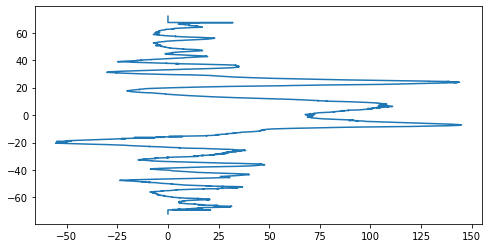

In [9]:

#Plot results along with currently accepted ZWP to compare. 
path2wp = path2data + 'ZWP_j2016_PJ03.txt'
lat_zwp, zwp = readZWP(path2wp) 
fig, axs = plt.subplots(1, 1,figsize=(8,4))
axs.plot(zwp,lat_zwp,label='JT - ZWP')
axs.plot(v_corr,latitude,label='DP')
axs.set_ylabel('Latitude (deg)')
axs.set_xlabel('Velocity (m/s)')
axs.set_ylim([-60,60])
plt.show()